In [15]:
import tensorflow as tf
import os
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [16]:
print(tf.config.list_physical_devices())
print(tf.__version__)

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]
2.15.0


In [17]:
pathh = 'MNISTClassifier'

for parent, dirs, files in os.walk(pathh, topdown=False):
  for file in files:
    file_path = os.path.join(parent, file)
    os.remove(file_path)
  for dir in dirs:
    dir_path = os.path.join(parent, dir)
    os.rmdir(dir_path)

  os.rmdir('./MNISTClassifier')

In [18]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
train_images = train_images.reshape((60000, 28, 28)).astype("float32") / 255
train_images = np.expand_dims(train_images, axis=3) #adds a channel
test_images = test_images.reshape((10000, 28, 28)).astype("float32") / 255
test_images = np.expand_dims(test_images, axis=3)
# x_train, x_test = images, test_images
# y_train, y_test = labels, test_labels

In [19]:
x_test, y_test = test_images, test_labels

In [20]:
x_train, x_val, y_train, y_val = train_test_split(train_images, train_labels, random_state=104, test_size=0.166655, shuffle=True)

In [21]:
print('x_train.shape', x_train.shape)
print('y_train.shape', y_train.shape)
print('x_val.shape', x_val.shape)
print('y_val.shape', y_val.shape)
print('x_test.shape', x_test.shape)
print('y_test.shape', y_test.shape)

x_train.shape (50000, 28, 28, 1)
y_train.shape (50000,)
x_val.shape (10000, 28, 28, 1)
y_val.shape (10000,)
x_test.shape (10000, 28, 28, 1)
y_test.shape (10000,)


2


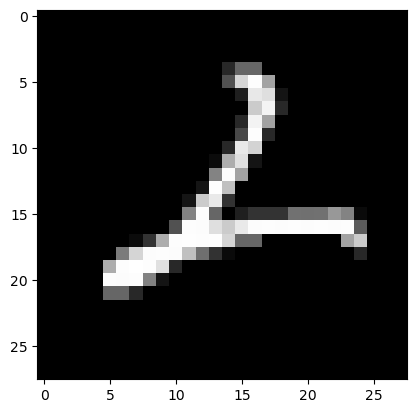

In [22]:
x_test[43].shape
digit = x_test[43]
fig = plt.figure
plt.imshow(digit, cmap='gray')
print(y_test[43])

#twos are located at [(1, 2), (35, 2), (38, 2), (43, 2), (47, 2), (72, 2), (77, 2), (82, 2), (106, 2), (119, 2)]

In [111]:
few_twos = []
count = 0
for index, label in enumerate(y_test):
  if count > 9:
    break
  if label == 2:
    few_twos.append((index, label))
    count += 1

print(few_twos)
#select labels that are digit 2

[(1, 2), (35, 2), (38, 2), (43, 2), (47, 2), (72, 2), (77, 2), (82, 2), (106, 2), (119, 2)]


In [24]:
class MNISTClassifier(tf.keras.Model):
    def __init__(self):
        super(MNISTClassifier, self).__init__()

        # Define the layers
        #for feature extration
        self.conv1 = tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1))
        self.max_pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.conv2 = tf.keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu')
        self.max_pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))
        self.flatten = tf.keras.layers.Flatten()
        self.dropout1 = tf.keras.layers.Dropout(0.25)
        self.dense1 = tf.keras.layers.Dense(128, activation='relu')
        self.dropout2 = tf.keras.layers.Dropout(0.5)
        self.dense2 = tf.keras.layers.Dense(10)
        self.layers_list = [self.conv1, self.max_pool1, self.conv2, self.max_pool2,
                           self.flatten, self.dropout1, self.dense1, self.dropout2, self.dense2]
    @tf.function
    def call(self, *args, **kwargs):
        # Define the forward pass
        # output is the model logits
        activation_list = []
        out = args[0]
        for layer in self.layers_list:
           out = layer(out)
           activation_list.append(out)

        if kwargs['training']:
          #notice that training is a kw argument checked when fit is called
          #so when model is training, all I need is the output logits to call the loss function upon
          return out
        else:
          prob = tf.nn.softmax(out)
          return out, prob

In [25]:
class SavefinalTrainingLogitsProp(keras.callbacks.Callback):
    def on_train_end(self, logs):
        self.out = model.predict(x_train)
        self.prob = tf.nn.softmax(self.out)
        print(self.out.shape, self.prob.shape)

In [26]:
model = MNISTClassifier()
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.legacy.Adam(learning_rate=0.0005),
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))
model.save('MNISTClassifier')

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.2961 - accuracy: 0.9099 - val_loss: 0.0795 - val_accuracy: 0.9731
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.1021 - accuracy: 0.9694 - val_loss: 0.0567 - val_accuracy: 0.9827
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0775 - accuracy: 0.9773 - val_loss: 0.0440 - val_accuracy: 0.9850
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0619 - accuracy: 0.9814 - val_loss: 0.0408 - val_accuracy: 0.9873
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0551 - accuracy: 0.9834 - val_loss: 0.0407 - val_accuracy: 0.9867
Epoch 6/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0475 - accuracy: 0.9851 - val_loss: 0.0354 - val_accuracy: 0.9882
Epoch 7/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.0431 - accuracy: 0.9864 - val_loss: 0.0348 - val_accuracy:

INFO:tensorflow:Assets written to: MNISTClassifier/assets


# Load model and make predictions

## prepare images and labels

In [115]:
twos_tupple = [(1, 2), (35, 2), (38, 2), (43, 2), (47, 2), (72, 2), (77, 2), (82, 2), (106, 2), (119, 2)]
reshaped_sample_twos = []
class_arr = []

for tup in twos_tupple:
    a_two = x_test[tup[0]]
    a_two = np.reshape(a_two, (-1, 28, 28, 1))
    a_two_label = y_test[tup[0]]
    a_two_label = tf.convert_to_tensor(a_two_label)
    class_arr.append(a_two_label)
    # print(a_two_label)
    reshaped_sample_twos.append(a_two)
reshaped_sample_twos = np.array(reshaped_sample_twos)

In [112]:
print(y_test[35])

2


In [32]:
model_mnist = tf.keras.models.load_model('MNISTClassifier')

predictions = []
for sample in reshaped_sample_twos:
    sample_prediction = model_mnist.predict(sample)
    predictions.append(sample_prediction)
#check a prediction
print(np.argmax(predictions[1][0]))

1/1 [==============================] - 0s 5ms/step
2


In [39]:
print(reshaped_sample_twos[0].shape)
# drop first dimension (batch) and prepare for attack
squeze_two = np.expand_dims(np.squeeze(reshaped_sample_twos[2]), axis=2)
squeze_two.shape
x = squeze_two
x = np.expand_dims(x, axis=0)
x = tf.convert_to_tensor(x)
y = y_test[35]
y = tf.convert_to_tensor(y)
print(y)
print(x.shape)

(1, 28, 28, 1)
tf.Tensor(2, shape=(), dtype=uint8)
(1, 28, 28, 1)


# Attack and Plot

In [62]:
def fgsm(model, x, y, eps):
    y = tf.one_hot(y, 10)
    y = np.reshape(y, (1,10))
    y_pred = None

    num_iteration = 1
    x = tf.cast(x, tf.float32)
    while (num_iteration <1000):
        with tf.GradientTape() as tape:
            tape.watch(x)
            y_pred = model(x)
            #model returns two output during prediction logits and probabilities i.e softmax O/P
            y_pred = y_pred[1]
            loss = tf.keras.losses.categorical_crossentropy(y, y_pred, from_logits=True)

        gradient = tape.gradient(loss, x) #compute how change in the image variable affects the loss
        gradient /= tf.math.reduce_std(gradient) + 1e-8
        signed_grad = tf.sign(gradient)
        perturbation = eps * signed_grad
        adv_x = x + perturbation
        adv_x = tf.clip_by_value(adv_x, 0, 1) #limits the values of the image matrix bw 0 and 1
        x = adv_x

        if num_iteration%10 == 0:
            print(f"Num_iterations: {num_iteration} \n Y_Pred: {np.argmax(y_pred)} \n Y: {np.argmax(y)}")
        if np.argmax(y_pred) != np.argmax(y):
            break
        num_iteration += 1

    return adv_x, perturbation
        
    

## Batch attack

In [131]:
def run_attacks(img_arr, class_arr, model, att_func, eps=0.025):
    results = []
    for img, cls in zip(img_arr, class_arr):
        x_test_adv, perturbation = att_func(model, img, cls, eps)
        results.append((x_test_adv, perturbation))
    return results
    

In [132]:
attack_results = run_attacks(reshaped_sample_twos, class_arr, model_mnist, fgsm)

Num_iterations: 10 
 Y_Pred: 2 
 Y: 2
Num_iterations: 10 
 Y_Pred: 2 
 Y: 2


In [135]:
adv_image = np.squeeze(attack_results[0][0])
adv_image = np.expand_dims(adv_image, axis=2)
org_image = np.expand_dims(np.squeeze(reshaped_sample_twos[0]), axis=2)
perturbation = np.expand_dims(np.squeeze(attack_results[0][1]), axis=2)
org_image.shape
adv_image.shape
# plt.imshow(adv_image, cmap='gray')

(28, 28, 1)

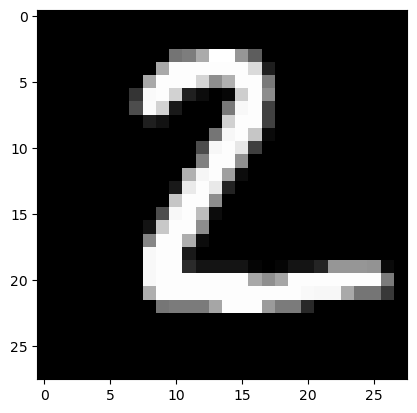

In [124]:
plt.imshow(org_image, cmap='gray')

In [110]:
print(reshaped_sample_twos.shape)

(10, 1, 28, 28, 1)


In [93]:
xb = reshaped_sample_twos[0]
xb.shape

(1, 28, 28, 1)

In [116]:
x_test_adv, perturbation = fgsm(model_mnist, reshaped_sample_twos[0], class_arr[0], 0.025)

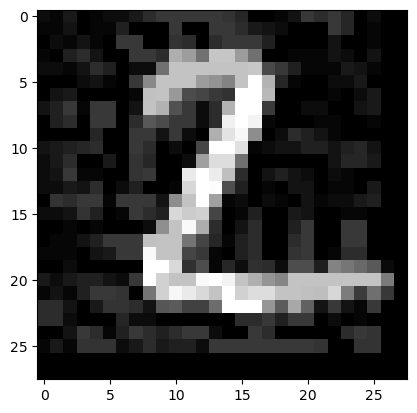

In [117]:
adv_image = np.squeeze(x_test_adv)
adv_image = np.expand_dims(adv_image, axis=2)
org_image = np.expand_dims(np.squeeze(xb), axis=2)
perturbation = np.expand_dims(np.squeeze(perturbation), axis=2)
org_image.shape
adv_image.shape
plt.imshow(adv_image, cmap='gray')

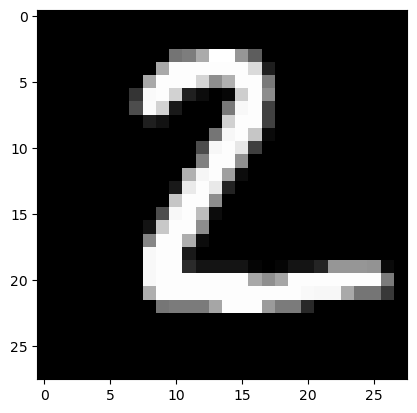

In [96]:
plt.imshow(org_image, cmap='gray')

In [134]:
adv_pred = model_mnist.predict(x_test_adv)
org_pred = model_mnist.predict(xb)

org_pred = np.argmax(org_pred[1])
adv_pred = np.argmax(adv_pred[1])
print(f"org_pred {org_pred} \t adv_pred {adv_pred}")

1/1 [==============================] - 0s 7ms/step
org_pred 2 	 adv_pred 1


# Batch distance measure

In [108]:
# flatten the image array as a 1D array
org_image_flattened = org_image.flatten()
adv_image_flattened = adv_image.flatten()

distance = np.linalg.norm(org_image_flattened - adv_image_flattened)
distance = round(distance, 2)
print(distance)

3.41


In [136]:
# adv_image = np.squeeze(attack_results[0][0])
# adv_image = np.expand_dims(adv_image, axis=2)
# org_image = np.expand_dims(np.squeeze(reshaped_sample_twos[0]), axis=2)
# perturbation = np.expand_dims(np.squeeze(attack_results[0][1]), axis=2)
# org_image.shape
# adv_image.shape

In [153]:
def batch_distance_measure(adv_img_arr, org_img_arr):
    l2_norm_distance = []
    for adv_img, org_img in zip(adv_img_arr, org_img_arr):
        cur_adv_img = np.array(adv_img[0])
        # print(cur_adv_img.shape)
        # print(org_img.shape)
        adv_img_flattened = cur_adv_img.flatten()
        org_img_flattened = org_image.flatten()
        distance = np.linalg.norm(org_img_flattened - adv_img_flattened)
        l2_norm_distance.append(distance)
    return l2_norm_distance
        

In [154]:
l2_norm_distance = batch_distance_measure(attack_results, reshaped_sample_twos)
# print(l2_norm_distance)

# Visualize predictions and images

In [157]:
# fig = plt.figure(figsize=(10, 10))

# rows = 1
# columns = 3

# fig.add_subplot(rows, columns, 1)
# plt.imshow(org_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Original Image \n predictions: {org_pred}')

# fig.add_subplot(rows, columns, 2)
# plt.imshow(perturbation, cmap='gray')
# plt.axis('off')
# plt.title(f'Pertubation\n /Distance: {distance}')

# fig.add_subplot(rows, columns, 3)
# plt.imshow(adv_image, cmap='gray')
# plt.axis('off')
# plt.title(f'Adversarial Image \n Prediction: {adv_pred}')

In [170]:
predi = model_mnist.predict(reshaped_sample_twos[0])
reshaped_sample_twos[0].shape
attack_results[0][0].shape
predioo = model_mnist.predict(attack_results[0][0])
print(np.argmax(predi), np.argmax(predioo))

1/1 [==============================] - 0s 7ms/step
2 1


In [183]:
def batch_visualization(adv_img_pert_arr, org_img_arr, dist_arr):
    total_plots = len(dist_arr)
    rows = total_plots
    columns = 3
    fig = plt.figure(figsize=(10, 10))
    counter = 1
    for idx in range(total_plots):
        org_pred = model_mnist.predict(reshaped_sample_twos[0])
        org_pred = np.argmax(org_pred)
        cur_org_img = org_img_arr[idx]
        fig.add_subplot(rows, columns, counter)
        cur_org_img_sq = np.expand_dims(np.squeeze(cur_org_img), axis=2)
        plt.imshow(cur_org_img_sq, cmap='gray')
        plt.axis('off')
        plt.title(f'Original Image \n predictions: {org_pred}')

        cur_dist = dist_arr[idx]
        fig.add_subplot(rows, columns, counter+1)
        plt.imshow(perturbation, cmap='gray')
        plt.axis('off')
        plt.title(f'Pertubation\n /Distance: {cur_dist}')

        cur_adv_img = adv_img_pert_arr[idx][0]
        adv_pred = model_mnist.predict(cur_adv_img)
        adv_pred = np.argmax(adv_pred)
        cur_adv_img_sq = np.expand_dims(np.squeeze(cur_adv_img), axis=2)
        fig.add_subplot(rows, columns, counter+2)
        plt.imshow(adv_image, cmap='gray')
        plt.axis('off')
        plt.title(f'Adversarial Image \n Prediction: {adv_pred}')
        counter += 1
    plt.show()

1/1 [==============================] - 0s 6ms/step


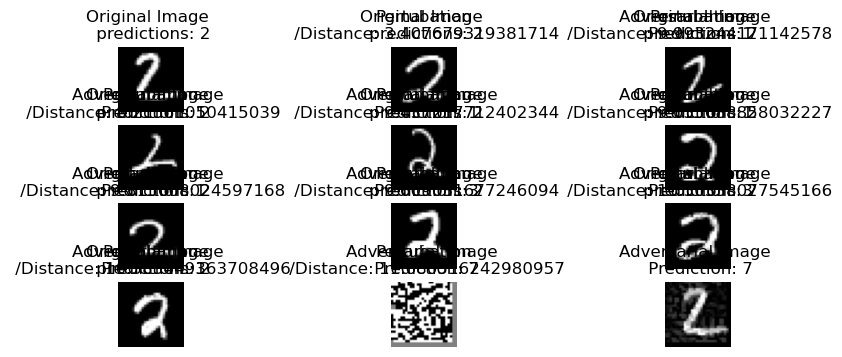

In [184]:
batch_visualization(attack_results, reshaped_sample_twos, l2_norm_distance)